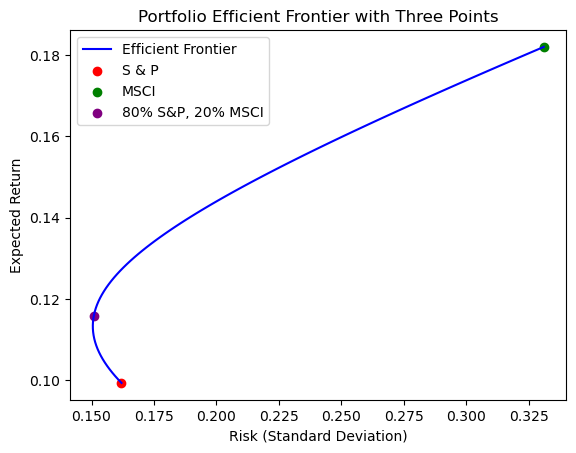

In [1]:
import numpy as np
import matplotlib.pyplot as plt


class Portfolio:
    def __init__(self, st):
        self.st1 = st[0]
        self.st2 = st[1]

    def calculate_portfolio(self, weight1):
        weight2 = 1 - weight1
        out = weight1 * self.st1[2] + weight2 * self.st2[2]
        risk = (weight1**2 * self.st1[3]**2 + weight2**2 * self.st2[3]**2 +
                2 * weight1 * weight2 * self.st1[4]) ** 0.5
        return out, risk

    def plot_values(self):
        returns = []
        risks = []
        
        for weight1 in np.linspace(0, 1, 100):
            ret, risk = self.calculate_portfolio(weight1)
            returns.append(ret)
            risks.append(risk)
        
        plt.plot(risks, returns, label="Efficient Frontier", color='blue')
        
        # رسم سه نقطه
        plt.scatter(self.st1[3], self.st1[2], color='red', label=self.st1[0])
        plt.scatter(self.st2[3], self.st2[2], color='green', label=self.st2[0])
        
        combined_return, combined_risk = self.calculate_portfolio(0.8)
        plt.scatter(combined_risk, combined_return, color='purple', label="80% S&P, 20% MSCI")

        plt.xlabel("Risk (Standard Deviation)")
        plt.ylabel("Expected Return")
        plt.title("Portfolio Efficient Frontier with Three Points")
        plt.legend()
        plt.show()

sto = Portfolio([['S & P', 0.8, 0.0993, 0.162, 0.005], ['MSCI', 0.2, 0.182, 0.331, 0.005]])
sto.plot_values()